In [163]:
import pandas as pd
import numpy as np
import xgboost as xgb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn_pandas import DataFrameMapper
from sklearn2pmml import PMMLPipeline
from sklearn2pmml import sklearn2pmml 

In [164]:
header = ['Number of times pregnant',
          'Plasma glucose concentration',
          'Diastolic blood pressure',
          'Triceps skin fold thickness',
          'Serum insulin',
          'BMI',
          'Diabetes pedigree function',
          'Age',
          'Class']

header_cols = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
data = pd.read_csv('../data/pima-indians-diabetes.csv', names=header_cols)
data.head(3).append(data.tail(3))
# print(data.describe())

,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [165]:
# diabetes = datasets.load_diabetes()
# diabetes
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [166]:
def splitXy(data):
    dataset = data.values
    X = dataset[:,0:-1]
    y = dataset[:,-1]
#     X.shape, y.shape
    return X, y


In [167]:
X, y = splitXy(data)

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [168]:
def fit(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    return model

In [169]:
model = fit(X_train, y_train)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [170]:
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
#     'lambda': 10,
    'subsample': 1,
    'colsample_bylevel': 1,
    'colsample_bytree': 1,
    'min_child_weight': 1,
    'eta': 0.1,
    'seed': 0,
    'nthread': 8,
    'silent': 1
}

# for xgb input
dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)
dtest = xgb.DMatrix(X_test)

watchlist = [(dtrain, 'train')]

# 模型训练
bst = xgb.train(params, dtrain, num_boost_round=100, evals=watchlist)

ypred = bst.predict(dtest)
y_pred = np.where(ypred >= 0.5, 1, 0)

print('ACC: %.4f' % metrics.accuracy_score(y_test, y_pred))

bst.dump_model('./mod/pima-model.txt')

[0]	train-auc:0.852306
[1]	train-auc:0.864931
[2]	train-auc:0.868797
[3]	train-auc:0.880144
[4]	train-auc:0.876832
[5]	train-auc:0.88006
[6]	train-auc:0.884985
[7]	train-auc:0.885666
[8]	train-auc:0.892516
[9]	train-auc:0.892861
[10]	train-auc:0.894306
[11]	train-auc:0.896719
[12]	train-auc:0.897988
[13]	train-auc:0.898601
[14]	train-auc:0.901451
[15]	train-auc:0.903779
[16]	train-auc:0.904947
[17]	train-auc:0.905309
[18]	train-auc:0.907721
[19]	train-auc:0.908452
[20]	train-auc:0.9102
[21]	train-auc:0.910974
[22]	train-auc:0.911739
[23]	train-auc:0.913764
[24]	train-auc:0.913688
[25]	train-auc:0.914361
[26]	train-auc:0.915084
[27]	train-auc:0.916294
[28]	train-auc:0.91695
[29]	train-auc:0.918093
[30]	train-auc:0.920093
[31]	train-auc:0.920673
[32]	train-auc:0.920774
[33]	train-auc:0.921648
[34]	train-auc:0.923127
[35]	train-auc:0.925153
[36]	train-auc:0.925632
[37]	train-auc:0.926414
[38]	train-auc:0.927506
[39]	train-auc:0.928011
[40]	train-auc:0.929356
[41]	train-auc:0.930078
[42]	t

In [171]:
def predict(model, X, y):
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y, predictions)
    return predictions, accuracy

In [172]:
_, accuracy = predict(model, X_test, y_test)
print('Accuracy: %.2f%%' % (accuracy * 100.))

Accuracy: 77.95%


In [173]:
import pickle

# save model to file
pickle.dump(model, open('./mod/pima.dat', 'wb'))

# load model from file
pima_model = pickle.load(open('./mod/pima.dat', 'rb'))

_, accuracy = predict(pima_model, X_test, y_test)
print('Accuracy: %.2f%%' % (accuracy * 100.))

Accuracy: 77.95%


In [182]:
# 保存为PMML格式
mapper = DataFrameMapper([
    (['f1'], None),
    (['f2'], None),
    (['f3'], None),
    (['f4'], None),
    (['f5'], None),
    (['f6'], None),
    (['f7'], None)]
)

# pipeline = PMMLPipeline([('mapper', mapper), ('classifier', model)])
# pipeline.fit(data[data.columns.difference(['f8'])], data['f8'])

# sklearn2pmml(pipeline, './data/pima-model.pmml', with_repr=True)

# data.columns
# model

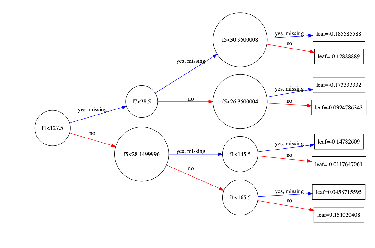

In [183]:
xgb.plot_tree(model, num_trees=0, rankdir='LR')
# plt.show()
# plt.savefig('./mod/pima-tree.png')

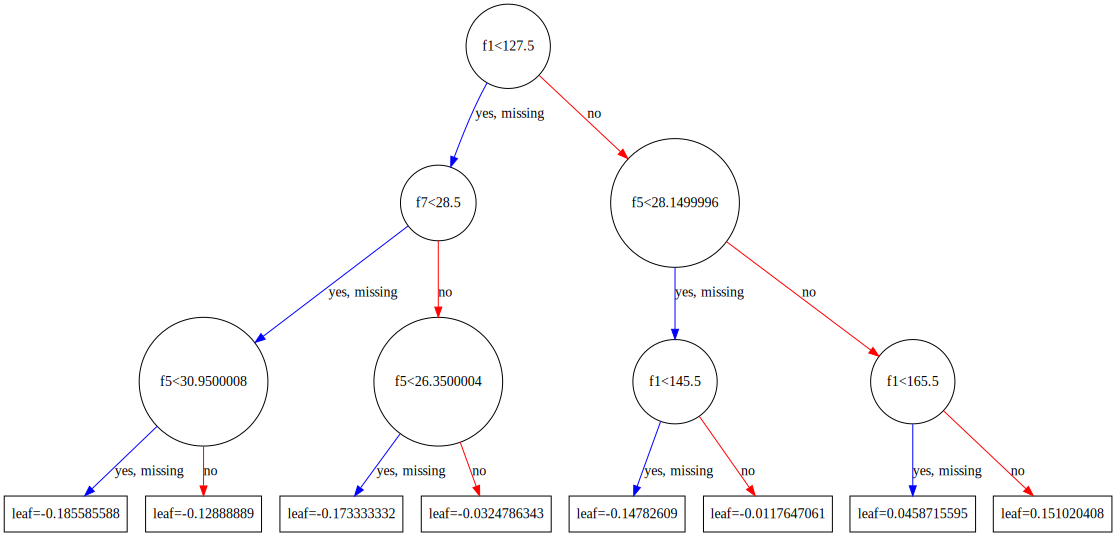

In [184]:
xgb.to_graphviz(model, num_trees=0)

In [177]:
# 第一个样本的预测分数
X_test[0], y_test[0]

(array([ 1.  , 90.  , 62.  , 12.  , 43.  , 27.2 ,  0.58, 24.  ]), 0.0)

In [178]:
y_pred = model.predict_proba(X_test)
print(y_pred[0])

y_prob = bst.predict(dtest)
print(y_prob[0])

[0.9545844  0.04541559]
0.045415588


In [ ]:
# 根据模型文件，构建决策树 


In [181]:
# 计算第一个样本经过100棵树之后的总分数


In [ ]:
# 总分数转换为sigmoid函数值
